<a href="https://colab.research.google.com/github/IndraP24/FSDL-21-Codes-and-Lab/blob/main/lab1/notebooks/01_nn_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Fundamentals - Coding a Neural Network

```
# This is treated as a code block
```
---

# Colab environment

In [1]:
!python --version

Python 3.7.10


In [2]:
!pip list | grep tensor

tensorboard                   2.4.1         
tensorboard-plugin-wit        1.8.0         
tensorflow                    2.4.1         
tensorflow-datasets           4.0.1         
tensorflow-estimator          2.4.0         
tensorflow-gcs-config         2.4.0         
tensorflow-hub                0.12.0        
tensorflow-metadata           0.30.0        
tensorflow-probability        0.12.1        


In [3]:
!pip list | grep torch

torch                         1.8.1+cu101   
torchsummary                  1.5.1         
torchtext                     0.9.1         
torchvision                   0.9.1+cu101   


In [4]:
!nvidia-smi

Thu May 20 15:19:07 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Basic Numerical Computing

In [5]:
import numpy as np

# Initialize a numpy ndarray 3 rows , 2 cols
X = np.zeros((3, 2))
X

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [6]:
# By default, ndarrays are float64
X.shape, X.dtype

((3, 2), dtype('float64'))

In [7]:
# We can set values of a whole row
X[0, :] = 1
X

array([[1., 1.],
       [0., 0.],
       [0., 0.]])

In [8]:
# We can set values of a whole colummn
X[:, 0] = 2
X

array([[2., 1.],
       [2., 0.],
       [2., 0.]])

In [9]:
X = np.array([
              [1, 2],
              [3, 4],
              [5, 6]
])
X

array([[1, 2],
       [3, 4],
       [5, 6]])

In [10]:
x = np.array([10, 20])
print(X.shape, x.shape)

# We can add ndarrays of different dimensions
X + x #Broadcasting

(3, 2) (2,)


array([[11, 22],
       [13, 24],
       [15, 26]])

In [11]:
# Element-wise multiplication

X * x

array([[ 10,  40],
       [ 30,  80],
       [ 50, 120]])

In [12]:
# Matrix multiplication

x = np.array([[10, 20], ]).T
result = X @ x # alternatively, np.dot(X, x)
result

array([[ 50],
       [110],
       [170]])

## Indexing

In [13]:
X = np.random.rand(3, 2)
X

array([[0.58047456, 0.81615523],
       [0.206289  , 0.92417425],
       [0.05556866, 0.65877655]])

In [14]:
X > 0.5

array([[ True,  True],
       [False,  True],
       [False,  True]])

In [15]:
X[X > 0.5] = 1
X

array([[1.        , 1.        ],
       [0.206289  , 1.        ],
       [0.05556866, 1.        ]])

# Basic Plotting

In [16]:
import matplotlib.pyplot as plt
import matplotlib
plt.set_cmap('gray')
matplotlib.rcParams['figure.figsize'] = (12, 8)

<Figure size 432x288 with 0 Axes>

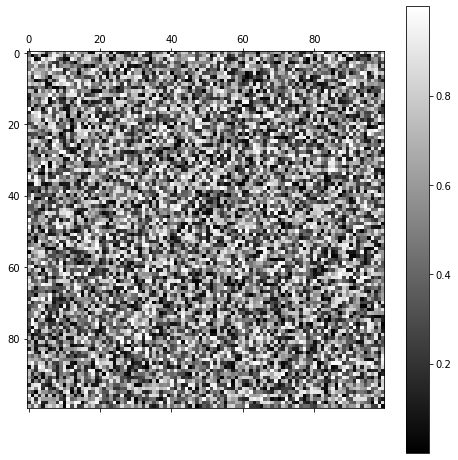

In [17]:
X = np.random.rand(100, 100)
plt.matshow(X)
plt.colorbar()

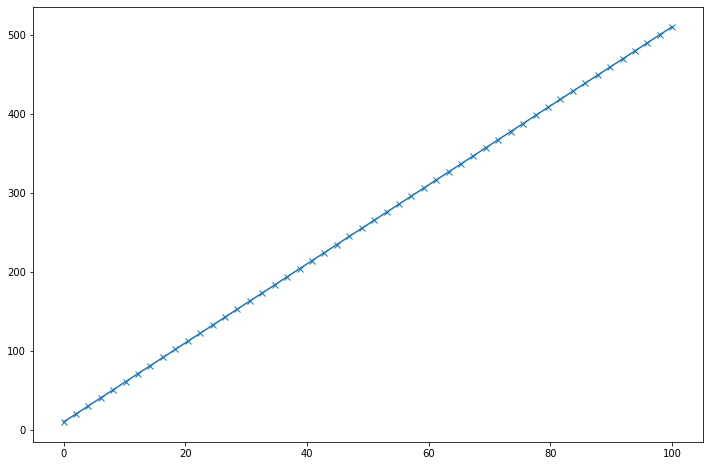

In [18]:
x = np.linspace(0, 100)
y = x * 5 + 10

plt.plot(x, y, 'x-')

# Basic Regression with a linear model

x is 1-dimensional

X: (50, 1), Weights: (1, 1), Bias: (1,), y: (50, 1)


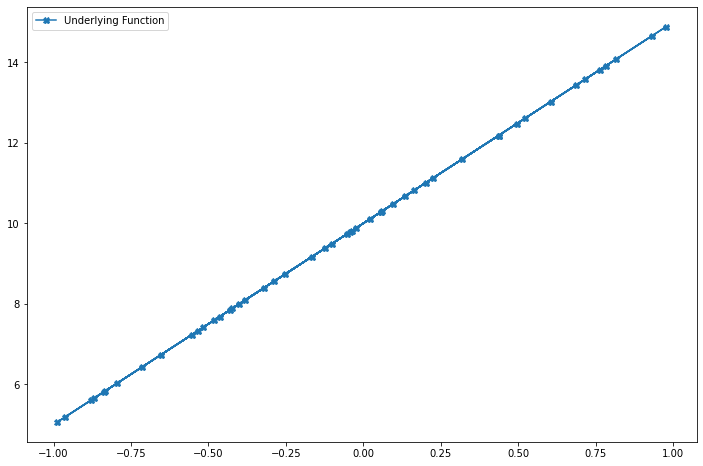

In [19]:
n = 50

d = 1
X = np.random.uniform(-1, 1, (n, d))

# y = 5x + 10
weights_true = np.array([[5], ])
bias_true = np.array([10])

y_true = X @ weights_true + bias_true
print(f'X: {X.shape}, Weights: {weights_true.shape}, Bias: {bias_true.shape}, y: {y_true.shape}')

plt.plot(X, y_true, marker='X', label="Underlying Function")
plt.legend()

## Basic Prediction function: Linear

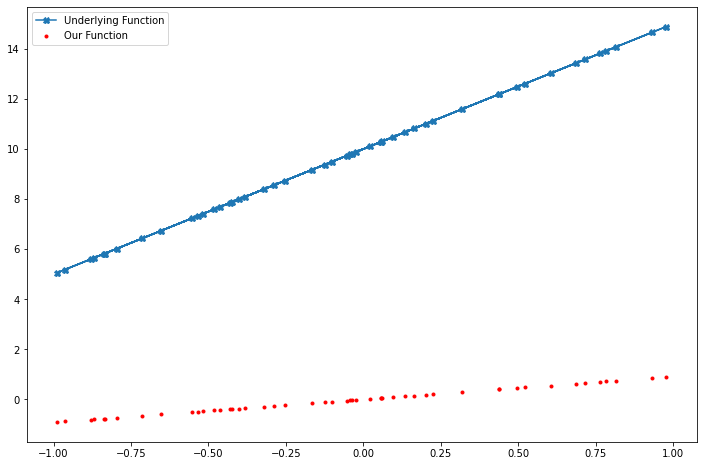

In [20]:
# Initailizing our predictions


class Linear:
    def __init__(self, num_input, num_output=1):
        # The initialization is important to properly deal with different input
        # sizes (otherwise gradients quickly go to 0).
        self.weights = np.random.randn(num_input, num_output) * np.sqrt(2. / num_input)
        self.bias = np.zeros((1))

    def __call__(self, X):
        return X @ self.weights + self.bias

linear = Linear(d)
y_pred = linear(X)
plt.plot(X, y_true, marker="X", label="Underlying Function")
plt.scatter(X, y_pred, color='r', marker='.', label="Our Function")
plt.legend()

## Basic Loss Function: MSE

In [21]:
# How wrong are these initial predictions, exactly?
# It's up to us, and our definition is called the loss function.
# Let's use the Mean Squared Error (MSE), as our loss function.

class MSE:
    def __call__(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true
        return ((y_true - y_pred) ** 2).mean()

loss = MSE()
print(f'Our initial loss is {loss(y_pred, y_true)}')

Our initial loss is 99.03769794065259


## Back propagation

In [22]:
# Let's use gradient descent to learn the weights and bias that minimizes the loss function.
# For this, we need the gradient of the loss function and the gradients of the linear function.

class MSE:
    def __call__(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true
        return ((y_pred - y_true) ** 2).mean()

    def backward(self):
        n = self.y_true.shape[0]
        self.gradient = 2. * (self.y_pred - self.y_true) / n
        return self.gradient


class Linear:
    def __init__(self, input_dim: int, num_hidden: int = 1):
        self.weights = np.random.randn(input_dim, num_hidden) - 0.5
        self.bias = np.random.randn(1) - 0.5

    def __call__(self, X):
        self.X = X
        output = X @ self.weights + self.bias
        return output

    # y = w*x + b
    # dy/dx = w
    # dy/dw = X
    # dy/db = 1

    def backward(self, gradient):
        self.weights_gradient = self.X.T @ gradient
        self.bias_gradient = gradient.sum()
        self.X_gradient = gradient @ self.weights.T
        return self.X_gradient

    def update(self, lr):
        self.weights = self.weights - lr * self.weights_gradient
        self.bias = self.bias - lr * self.bias_gradient

In [23]:
# Taking one step forward and one step backward to make sure nothing breaks, 
# and that the loss decreases

loss = MSE()
linear = Linear(d)
y_pred = linear(X)
print(loss(y_pred, y_true))
loss_gradient = loss.backward()
linear.backward(loss_gradient)
linear.update(0.1)
y_pred = linear(X)
print(loss(y_pred, y_true))

76.29184100515705
49.56078011597982


## Train using Gradient Descent

Epoch 0, loss 122.3347785108022
Epoch 5, loss 18.280870830620188
Epoch 10, loss 4.889106399526193
Epoch 15, loss 2.1443396512034987
Epoch 20, loss 1.121847228553681
Epoch 25, loss 0.6108789717412748
Epoch 30, loss 0.3352968143360923
Epoch 35, loss 0.1843190020734871
Epoch 40, loss 0.10135348753733131
Epoch 45, loss 0.05573548759768331
Epoch 50, loss 0.03064993886157838
Epoch 55, loss 0.01685498308700285


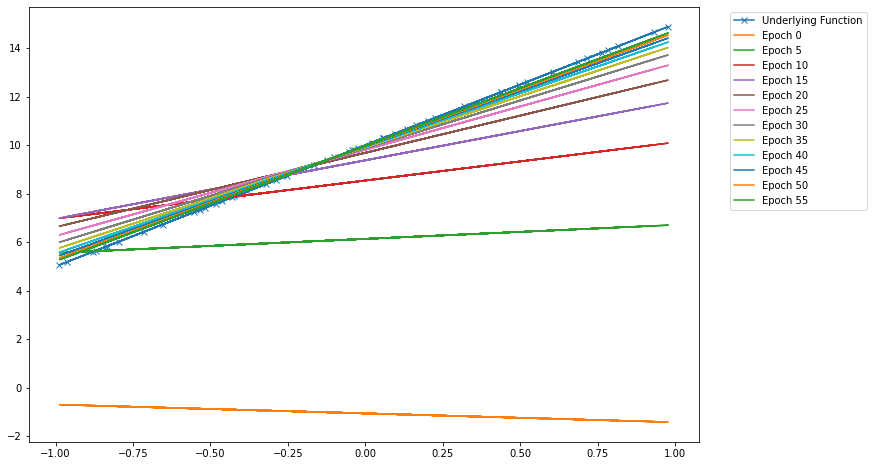

In [24]:
plt.plot(X, y_true, marker='x', label='Underlying Function')

loss = MSE()
linear = Linear(d)

num_epochs = 60
lr = 0.1

for epoch in range(num_epochs):
    y_pred = linear(X)
    loss_value = loss(y_pred, y_true)

    if epoch % 5 == 0:
        print(f'Epoch {epoch}, loss {loss_value}')
        plt.plot(X, y_pred.squeeze(), label=f'Epoch {epoch}')

    gradient_from_loss = loss.backward()
    linear.backward(gradient_from_loss)
    linear.update(lr)

plt.legend(bbox_to_anchor = (1.04, 1), loc="upper left");

## 2-Dimensional Inputs

(100, 2) (2, 1) (1,)
X: (100, 2), weights: (2, 1), bias: (1,), y: (100, 1)


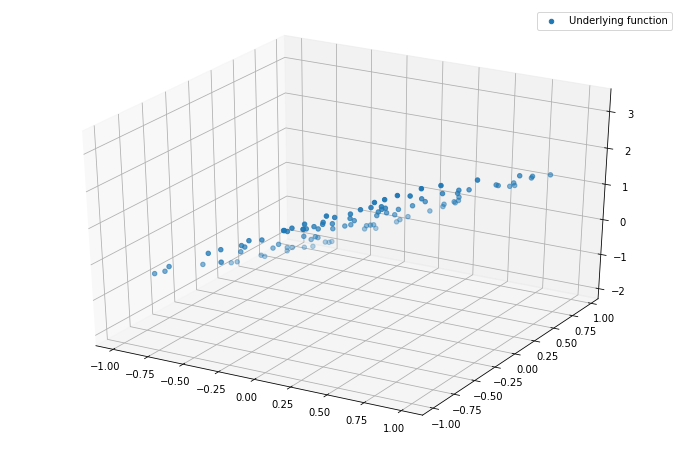

In [25]:
# 100 samples of 2 dimension
n = 100
d = 2
X = np.random.uniform(-1, 1, (n, d))

# y = W * X + b
# y = W_0 * X_0  +  W_1 * X_1  +  b
# y = W @ X + b
 

weights_true = np.array([[2, -1], ]).T
bias_true = np.array([0.5])
print(X.shape, weights_true.shape, bias_true.shape)

y_true = X @ weights_true + bias_true
print(f'X: {X.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

def plot_3d(X, y, y_pred=None):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], y, label='Underlying function')
    if y_pred is not None:
        ax.scatter(X[:, 0], X[:, 1], y_pred, label='Our function')
    plt.legend()

plot_3d(X, y_true)

1.325563657517583


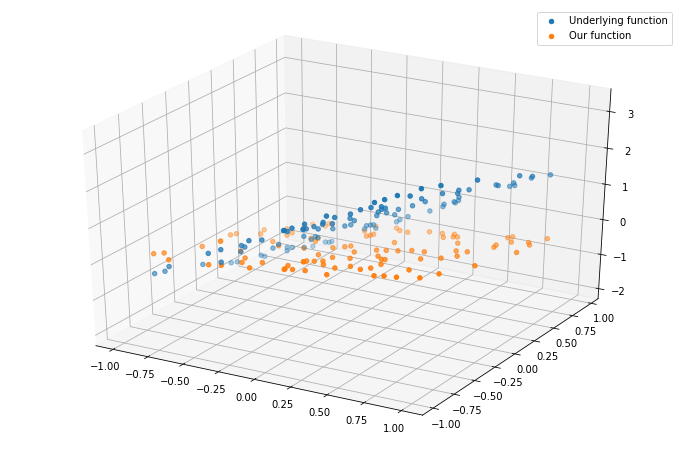

In [26]:
loss = MSE()
linear = Linear(2)
y_pred = linear(X)
print(loss(y_pred, y_true))
fig = plot_3d(X, y_true, y_pred)

Epoch: 0,  loss: 1.325563657517583
Epoch: 1,  loss: 1.0148216137272004
Epoch: 2,  loss: 0.7959699246983003
Epoch: 3,  loss: 0.6383662075959213
Epoch: 4,  loss: 0.5220997512195492
Epoch: 5,  loss: 0.43416386534213863
Epoch: 6,  loss: 0.3660025538173246
Epoch: 7,  loss: 0.3119368438173105
Epoch: 8,  loss: 0.26815431702585146
Epoch: 9,  loss: 0.23205937430840212
Epoch: 10,  loss: 0.2018546741300427
Epoch: 11,  loss: 0.1762708224531039
Epoch: 12,  loss: 0.1543912267680791
Epoch: 13,  loss: 0.13553811495345616
Epoch: 14,  loss: 0.11919793372050243
Epoch: 15,  loss: 0.10497215843290567
Epoch: 16,  loss: 0.09254455029922337
Epoch: 17,  loss: 0.08165910156595066
Epoch: 18,  loss: 0.07210496248579121
Epoch: 19,  loss: 0.06370596005766281
Epoch: 20,  loss: 0.05631316302625119
Epoch: 21,  loss: 0.04979949005151444
Epoch: 22,  loss: 0.04405570687027736
Epoch: 23,  loss: 0.038987383145445226
Epoch: 24,  loss: 0.03451252500316419
Epoch: 25,  loss: 0.030559693468566143
Epoch: 26,  loss: 0.02706648036

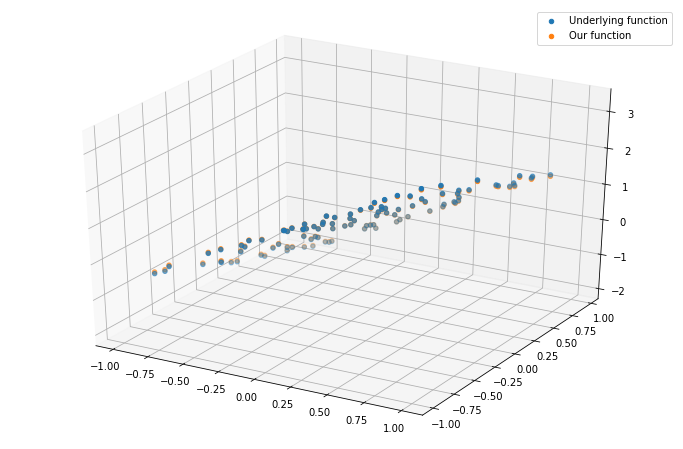

In [27]:
from typing import Callable

def fit(X: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
    for epoch in range(num_epochs):
        y_pred = model(X)
        loss_value = loss(y_pred, y)
        print(f'Epoch: {epoch},  loss: {loss_value}')
        gradient_from_loss = loss.backward()
        model.backward(gradient_from_loss)
        model.update(lr)

fit(X, y_true, model=linear, loss=loss, lr=0.1, num_epochs=60)
plot_3d(X, y_true, linear(X))

# Basic Regression with a Multi-layer Perceptron

So, we now have a way to automatically fit a linear function to N-dimensional data

How can this be made to work with non-linear data

X: (200, 2), weights: (2, 1), bias: (1,), y: (200, 1)


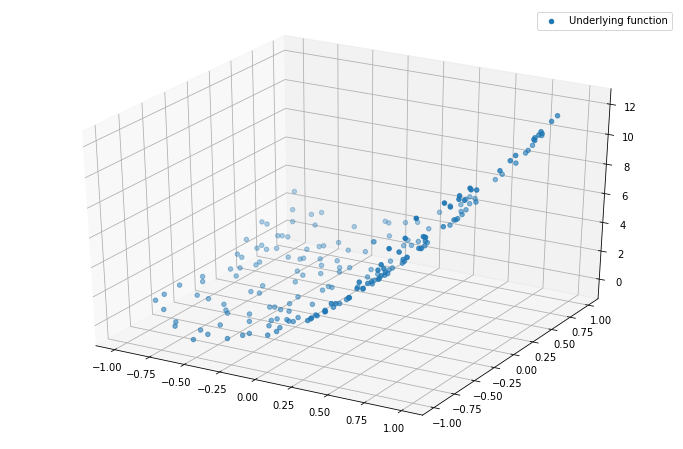

In [28]:
# Make a non-linear data

n = 200
d = 2
X = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[5, 1],]).T
bias_true = np.array([1])

y_true = (X ** 2) @ weights_true + X @ weights_true + bias_true
print(f'X: {X.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plot_3d(X, y_true)

Epoch: 0,  loss: 18.30717165150055
Epoch: 1,  loss: 14.637418104810253
Epoch: 2,  loss: 12.014133704764731
Epoch: 3,  loss: 10.098826996184313
Epoch: 4,  loss: 8.669479931934228
Epoch: 5,  loss: 7.579379990869036
Epoch: 6,  loss: 6.730665294364844
Epoch: 7,  loss: 6.057300684759769
Epoch: 8,  loss: 5.51410248551161
Epoch: 9,  loss: 5.069645633809938
Epoch: 10,  loss: 4.70166525476699
Epoch: 11,  loss: 4.394063073515641
Epoch: 12,  loss: 4.134948151531643
Epoch: 13,  loss: 3.915345800649507
Epoch: 14,  loss: 3.7283394587796694
Epoch: 15,  loss: 3.568494227573023
Epoch: 16,  loss: 3.431464584823784
Epoch: 17,  loss: 3.3137233169988884
Epoch: 18,  loss: 3.2123708983790458
Epoch: 19,  loss: 3.1249988084409166
Epoch: 20,  loss: 3.0495894683716096
Epoch: 21,  loss: 2.9844414098663354
Epoch: 22,  loss: 2.9281121298256028
Epoch: 23,  loss: 2.8793735799757156
Epoch: 24,  loss: 2.8371768695797455
Epoch: 25,  loss: 2.800623829484372
Epoch: 26,  loss: 2.768943794035957
Epoch: 27,  loss: 2.74147443

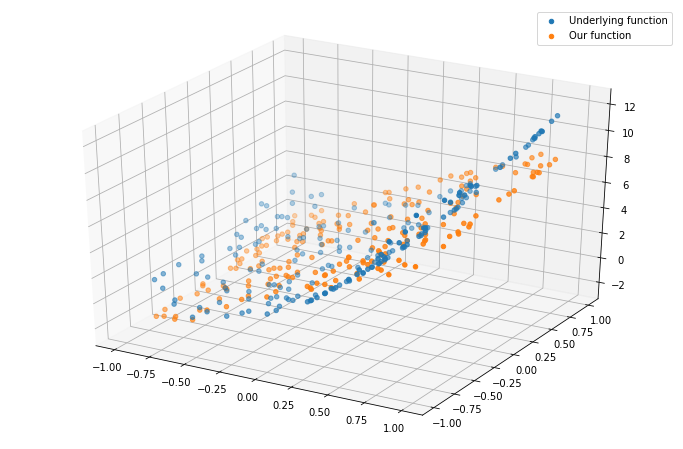

In [29]:
# WE can train just fine, but the final loss will remain high, as our linear function is incapable of representing the data

loss = MSE()
linear = Linear(d)
fit(X, y_true, model=linear, loss=loss, lr=0.1, num_epochs=40)
plot_3d(X, y_true, linear(X))

## Add non-linearity: ReLU

In [30]:
# In order to learn non-linear functions, we need non-linearities in our model

class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output

    def backward(self, output_gradient):
        # import pdb; pdb.set_trace   # For debugging
        self.input_gradient = (self.input_ > 0) * output_gradient
        return self.input_gradient



relu = Relu()
input_ = np.expand_dims(np.array([1, 0.5, 0, -0.5, -1]), -1)
print(relu(input_))
print(relu.backward(input_))

[[1. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
[[ 1. ]
 [ 0.5]
 [ 0. ]
 [-0. ]
 [-0. ]]


## Train our new non-linear model

36.227998580994196


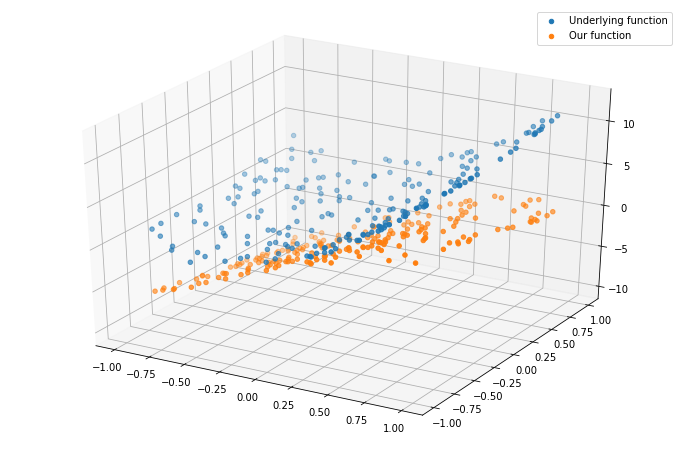

In [31]:
class Model:
    def __init__(self, input_dim, num_hidden):
        self.linear1 = Linear(input_dim, num_hidden)
        self.relu = Relu()
        self.linear2 = Linear(num_hidden, 1)

    def __call__(self, X):
        l1 = self.linear1(X)
        r = self.relu(l1)
        l2 = self.linear2(r)
        return l2

    def backward(self, output_gradient):
        linear2_gradient = self.linear2.backward(output_gradient)
        relu_gradient = self.relu.backward(linear2_gradient)
        linear1_gradient = self.linear1.backward(relu_gradient)
        # print('Model backward', linear2_gradient.shape, relu_gradient.shape, linear1_gradient.shape)
        # print pdb; pdb.set_trace()
        return linear1_gradient

    def update(self, lr):
        self.linear2.update(lr)
        self.linear1.update(lr)

loss = MSE()
model = Model(d, 10)
y_pred = model(X)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)
plot_3d(X, y_true, y_pred)

In [32]:
loss = MSE()
model = Model(d, 10)
y_pred = model(X)
loss_value = loss(y_pred, y_true)
print(loss_value)
loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(0.1)
y_pred = model(X)
loss_value = loss(y_pred, y_true)
print(loss_value)

50.542364464463716
15.105283364375019


Epoch: 0,  loss: 15.105283364375019
Epoch: 1,  loss: 14.058860750432736
Epoch: 2,  loss: 13.38915027750968
Epoch: 3,  loss: 12.960535574838923
Epoch: 4,  loss: 12.686222165129633
Epoch: 5,  loss: 12.510661582915695
Epoch: 6,  loss: 12.39830281029877
Epoch: 7,  loss: 12.32639319582394
Epoch: 8,  loss: 12.280371042560049
Epoch: 9,  loss: 12.250916864471158
Epoch: 10,  loss: 12.232066190494265
Epoch: 11,  loss: 12.220001759149058
Epoch: 12,  loss: 12.212280523088126
Epoch: 13,  loss: 12.20733893200913
Epoch: 14,  loss: 12.20417631371857
Epoch: 15,  loss: 12.20215223801261
Epoch: 16,  loss: 12.200856829560799
Epoch: 17,  loss: 12.200027768151637
Epoch: 18,  loss: 12.199497168849776
Epoch: 19,  loss: 12.199157585296584
Epoch: 20,  loss: 12.19894025182254
Epoch: 21,  loss: 12.198801158399151
Epoch: 22,  loss: 12.198712138608185
Epoch: 23,  loss: 12.198655165941965
Epoch: 24,  loss: 12.198618703435583
Epoch: 25,  loss: 12.1985953674315
Epoch: 26,  loss: 12.198580432388887
Epoch: 27,  loss: 12

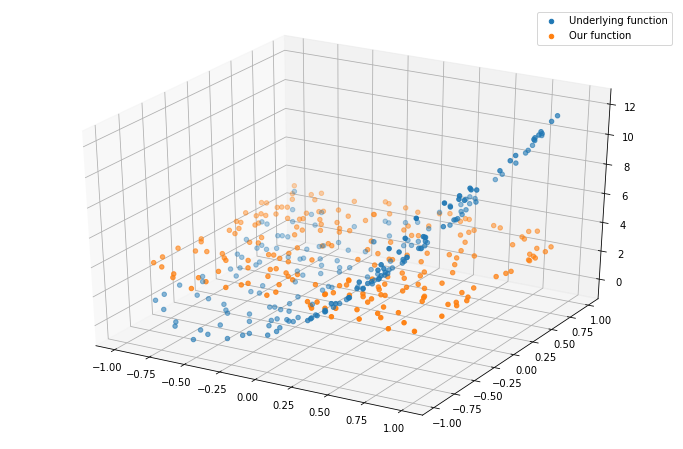

In [33]:
fit(X, y_true, model=model, loss=loss, lr=0.1, num_epochs=40)
plot_3d(X, y_true, model(X))

## Implemention with PyTorch

tensor(26.7564, grad_fn=<MseLossBackward>)


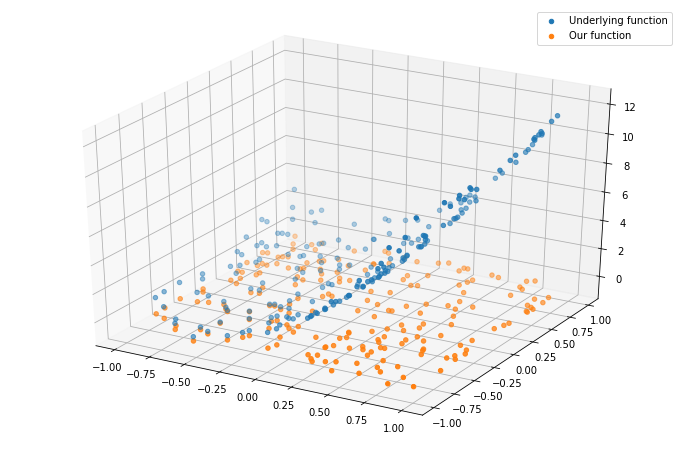

In [34]:
import torch
import torch.nn as nn


class TorchModel(nn.Module):
    def __init__(self, input_dim, num_hidden):
        super().__init__()
        self.linear1 = nn.Linear(input_dim, num_hidden)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(num_hidden, 1)

    def forward(self, X):
        l1 = self.linear1(X)
        r = self.relu(l1)
        l2 = self.linear2(r)
        return l2


loss = nn.MSELoss()
model = TorchModel(d, 10)
X_tensor = torch.tensor(X).float()
y_true_tensor = torch.tensor(y_true).float()
y_pred_tensor = model(X_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
plot_3d(X_tensor, y_true_tensor, y_pred_tensor.detach())

In [35]:
# Testing just 1 forward and backward step

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

optimizer.zero_grad()
y_pred_tensor = model(X_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
loss_gradient = loss_value.backward()
optimizer.step()

y_pred_tensor = model(X_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(26.7564, grad_fn=<MseLossBackward>)
tensor(14.6391, grad_fn=<MseLossBackward>)


tensor(14.6391, grad_fn=<MseLossBackward>)
tensor(9.5344, grad_fn=<MseLossBackward>)
tensor(6.2412, grad_fn=<MseLossBackward>)
tensor(4.1840, grad_fn=<MseLossBackward>)
tensor(2.9526, grad_fn=<MseLossBackward>)
tensor(2.1989, grad_fn=<MseLossBackward>)
tensor(1.7314, grad_fn=<MseLossBackward>)
tensor(1.4363, grad_fn=<MseLossBackward>)
tensor(1.2316, grad_fn=<MseLossBackward>)
tensor(1.0803, grad_fn=<MseLossBackward>)
tensor(0.9637, grad_fn=<MseLossBackward>)
tensor(0.8716, grad_fn=<MseLossBackward>)
tensor(0.7992, grad_fn=<MseLossBackward>)
tensor(0.7377, grad_fn=<MseLossBackward>)
tensor(0.6857, grad_fn=<MseLossBackward>)
tensor(0.6391, grad_fn=<MseLossBackward>)
tensor(0.5952, grad_fn=<MseLossBackward>)
tensor(0.5548, grad_fn=<MseLossBackward>)
tensor(0.5190, grad_fn=<MseLossBackward>)
tensor(0.4870, grad_fn=<MseLossBackward>)
tensor(0.4583, grad_fn=<MseLossBackward>)
tensor(0.4324, grad_fn=<MseLossBackward>)
tensor(0.4094, grad_fn=<MseLossBackward>)
tensor(0.3887, grad_fn=<MseLossBa

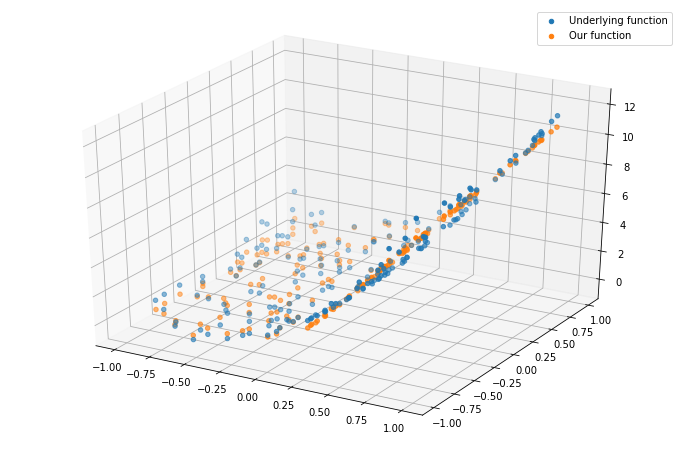

In [36]:
# Running the training loop

def torch_fit(X: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        y_pred_tensor = model(X_tensor)
        loss_value = loss(y_pred_tensor, y_true_tensor)
        print(loss_value)
        loss_value.backward()
        optimizer.step()

torch_fit(X_tensor, y_true_tensor, model=model, loss=loss, lr=0.1, num_epochs=40)
plot_3d(X, y_true, model(X_tensor).detach())

## Implementation with Tensorflow / Keras

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                30        
_________________________________________________________________
regression (Dense)           (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
7/7 [==============================] - 3s 2ms/step - loss: 15.7466
Epoch 2/20
7/7 [==============================] - 0s 2ms/step - loss: 1.5323
Epoch 3/20
7/7 [==============================] - 0s 2ms/step - loss: 0.5520
Epoch 4/20
7/7 [==============================] - 0s 2ms/step - loss: 0.3878
Epoch 5/20
7/7 [==============================] - 0s 3ms/step - loss: 0.3786
Epoc

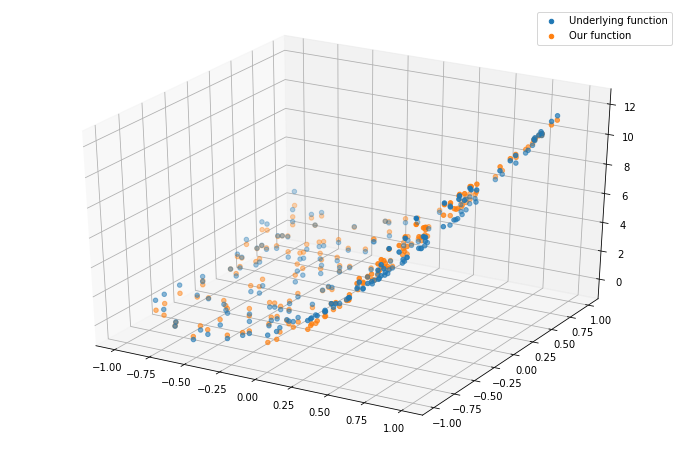

In [37]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

inputs = keras.Input(shape=(2,))
l1 = layers.Dense(10, activation='relu', name='dense_1')(inputs)
outputs = layers.Dense(1, name='regression')(l1)

model = keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())
model.compile(loss='mse', optimizer=optimizers.SGD(0.1))

model.fit(X, y_true, epochs=20)

y_pred = model.predict(X)

plot_3d(X, y_true, model(X))